# Longitudinal Sections

# PT3S Release

In [1]:
#pip install PT3S -U --no-deps

# Necessary packages for this Example

In [2]:
# No extra packages needed  

# Imports

In [3]:
import os
import logging
import pandas as pd
import datetime
import numpy as np
import subprocess

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from matplotlib.pyplot import Polygon
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MinuteLocator
import matplotlib.ticker as ticker

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool, CheckboxGroup, CustomJS, LinearAxis, Range1d

try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts

try:
    from PT3S import Rm
except:
    import Rm

In [4]:
import importlib

In [5]:
#importlib.reload(dxAndMxHelperFcts)

# Logging

In [6]:
logger = logging.getLogger()  

logFileName= r"Example3.log" 

loglevel = logging.DEBUG
logging.basicConfig(filename=logFileName
                        ,filemode='w'
                        ,level=loglevel
                        ,format="%(asctime)s ; %(name)-10s ; %(levelname)-7s ; %(message)s")    

fileHandler = logging.FileHandler(logFileName)     

logger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(logging.Formatter("%(levelname)-7s ; %(message)s"))
consoleHandler.setLevel(logging.INFO)
logger.addHandler(consoleHandler)

# Read Model and Results

In [7]:
dbFilename="Example3"
dbFile=os.path.join(os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))
                    +'/Examples/'
                    +dbFilename
                    +'.db3'
)

In [8]:
m=dxAndMxHelperFcts.readDxAndMx(dbFile=dbFile                                 
                                ,preventPklDump=True
                                ,maxRecords=-1
                                ,mxsVecsResults2MxDfVecAggs=[7,13,19,-1]
)

INFO    ; Dx.__init__: dbFile (abspath): c:\users\aUserName\3s\pt3s\Examples\Example3.db3 exists readable ...
INFO    ; dxAndMxHelperFcts.readDxAndMx: 
+..\Examples\Example3.db3 is newer than
+..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.1.MX1:
+SIR 3S' dbFile is newer than SIR 3S' mx1File
+in this case the results are maybe dated or (worse) incompatible to the model
INFO    ; dxAndMxHelperFcts.readDxAndMx: 
+..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.XML is newer than
+..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.1.MX1:
+SirCalc's xmlFile is newer than SIR 3S' mx1File
+in this case the results are maybe dated or (worse) incompatible to the model
INFO    ; dxAndMxHelperFcts.readDxAndMx: running C:\\3S\Sir3s\SirCalc-90-14-02-10_Potsdam\SirCalc.exe ...
INFO    ; Mx.setResultsToMxsFile: Mxs: ..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.1.MXS reading ...
INFO    ; dxWithMx.__init__: Example3: processing dx and mx ...


# Longitudinal Sections: V3_AGSN

In [9]:
m.V3_AGSN.head()

,Pos,pk,tk,LFDNR,NAME,XL,compNr,nextNODE,OBJTYPE,OBJID,...,RHO_n,mlc_n,"('STAT', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n","('TIME', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n","('TMIN', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n","('TMAX', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n","('TIME', 'mlc', Timestamp('2023-02-13 06:00:00'), Timestamp('2023-02-13 06:00:00'))_n","('TIME', 'mlc', Timestamp('2023-02-13 12:00:00'), Timestamp('2023-02-13 12:00:00'))_n","('TIME', 'mlc', Timestamp('2023-02-13 18:00:00'), Timestamp('2023-02-13 18:00:00'))_n","('TIME', 'mlc', Timestamp('2023-02-13 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n"
0,-1,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-E0,ROHR,5691533564979419761,...,965.700012,592.984993,592.958713,592.962286,592.958738,602.48758,602.03723,599.532769,602.487611,593.486796
0,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1683S,ROHR,5691533564979419761,...,965.701172,592.958713,592.958713,592.962286,592.958738,602.48758,602.03723,599.532769,602.487611,593.486796
1,1,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1693S,ROHR,5048873293262650113,...,965.702148,592.937202,592.937202,592.941546,592.937253,602.419501,601.971421,599.479587,602.419561,593.464211
2,2,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2163S,ROHR,5715081934973525403,...,965.702637,592.926449,592.926449,592.931165,592.926512,602.385399,601.938456,599.452945,602.385474,593.452897
3,3,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2043S,ROHR,5413647981880727734,...,965.703735,592.901884,592.901884,592.907361,592.901971,602.306951,601.862619,599.391653,602.307055,593.426847


# Plot Section No. 1

## Define Axes

In [10]:
def fyPH(ax,offset=0):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('PH Druck in bar')
    #ax.set_ylim(1,6)
    #ax.set_yticks(sorted(np.append(np.linspace(1,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fymlc(ax,offset=60):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('mlc Druckhöhe in mlc')
    #ax.set_ylim(1,6)
    #ax.set_yticks(sorted(np.append(np.linspace(1,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fybarBzg(ax,offset=120):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('H Druck in barBzg')
    #ax.set_ylim(1,6)
    #ax.set_yticks(sorted(np.append(np.linspace(1,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')

def fyM(ax,offset=180):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('QM Massenstrom in t/h')
    #ax.set_ylim(500,550)
    #ax.set_yticks(sorted(np.append(np.linspace(500,550,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fyT(ax,offset=240):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('T Tempertatur in °C')
    ax.set_ylim(55,95)
    #ax.set_yticks(sorted(np.append(np.linspace(0,95,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
 

## Plotfunction

In [11]:
def plot(dfAGSN=pd.DataFrame()
        ,dfAGSNRL=pd.DataFrame()
        ,PHCol='PH_n'
        ,mlcCol='mlc_n'
        ,zKoorCol='ZKOR_n'
        ,barBzgCol='H_n'
        ,QMCol='QM'
        ,TCol='T_n'
        ,xCol='LSum'
        
):
                       
    fig, ax0 = plt.subplots(figsize=Rm.DINA3q)
    
    ax0.set_yticks(np.linspace(0, 10, 21))
    ax0.yaxis.set_ticklabels([])
    ax0.grid()

    #PH
    ax1 = ax0.twinx()     
    fyPH(ax1) 
    PH_SL=ax1.plot(dfAGSN[xCol], dfAGSN[PHCol], color='red', label='PH SL',ls='dotted')
    PH_RL=ax1.plot(dfAGSNRL[xCol], dfAGSNRL[PHCol], color='blue', label='PH RL',ls='dotted')
    
    #mlc
    ax11 = ax0.twinx()     
    fymlc(ax11) 
    mlc_SL=ax11.plot(dfAGSN[xCol], dfAGSN[mlcCol], color='red', label='mlc SL')
    mlc_RL=ax11.plot(dfAGSNRL[xCol], dfAGSNRL[mlcCol], color='blue', label='mlc RL')
    
    z=ax11.plot(dfAGSN[xCol], dfAGSN[zKoorCol], color='black', label='z',ls='dashed',alpha=.5)
    
    #barBZG
    ax12 = ax0.twinx()     
    fybarBzg(ax12) 
    barB_SL=ax12.plot(dfAGSN[xCol], dfAGSN[barBzgCol], color='red', label='H SL',ls='dashdot')
    barB_RL=ax12.plot(dfAGSNRL[xCol], dfAGSNRL[barBzgCol], color='blue', label='H RL',ls='dashdot')
    
    #M
    ax2 = ax0.twinx()     
    fyM(ax2)
    QM_SL=ax2.step(dfAGSN[xCol], dfAGSN[QMCol]*dfAGSN['direction'], color='orange', label='M SL')
    QM_RL=ax2.step(dfAGSNRL[xCol], dfAGSNRL[QMCol]*dfAGSNRL['direction'], color='cyan', label='M RL',ls='--')
    
    #T
    ax3 = ax0.twinx() 
    fyT(ax3)
    T_SL=ax3.plot(dfAGSN[xCol], dfAGSN[TCol], color='pink', label='T SL')
    T_RL=ax3.plot(dfAGSNRL[xCol], dfAGSNRL[TCol], color='lavender', label='T RL')

    ax0.set_title(f'Longitudinal Section for {dbFilename} (Number of x-Points = {dfAGSN.shape[0]})')

    # added these three lines
    lns =  PH_SL+ PH_RL + mlc_SL+ mlc_RL + barB_SL+ barB_RL+ QM_SL+ QM_RL + T_SL+ T_RL + z
    labs = [l.get_label() for l in lns]
    ax0.legend(lns, labs)#, loc=0)
    
    plt.show()

## Plot without vector data

In [12]:
dfAGSN=m.V3_AGSN[
    (m.V3_AGSN['LFDNR']==1)
    &
    (m.V3_AGSN['XL']==1)
]

In [13]:
dfAGSNRL=m.V3_AGSN[
    (m.V3_AGSN['LFDNR']==1)
    &
    (m.V3_AGSN['XL']==2)
]

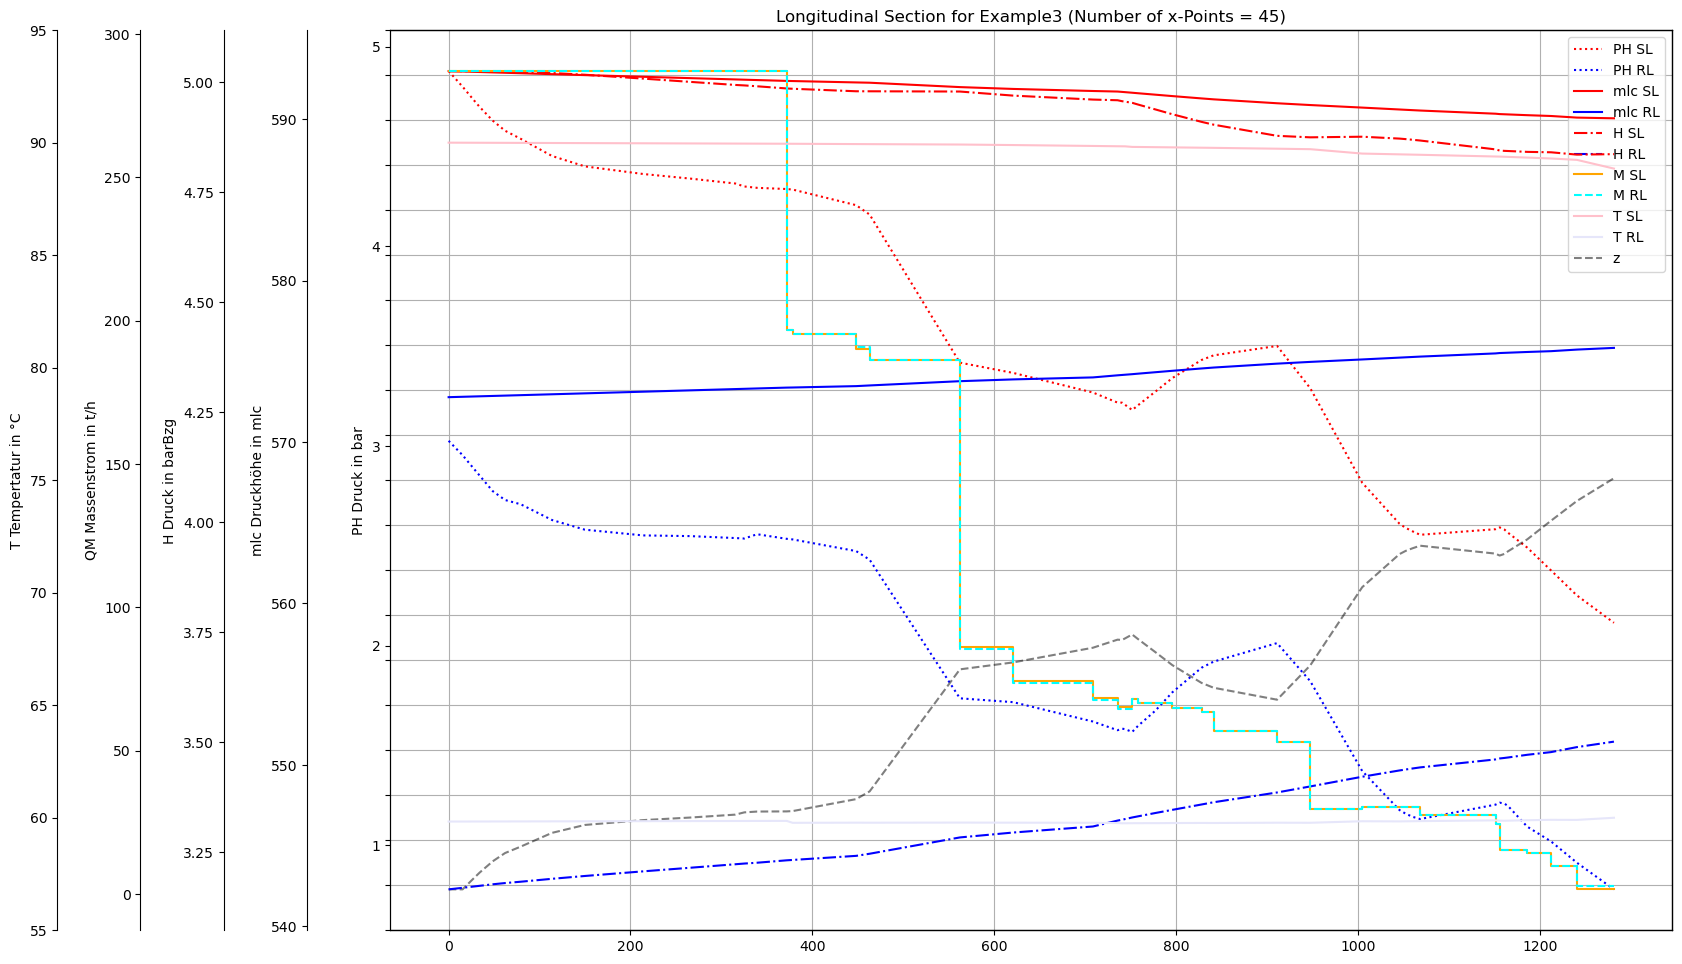

In [14]:
plot(dfAGSN,dfAGSNRL)

## Plot with vector data (with pipe interior points)

In [15]:
dfAGSNVec=m.V3_AGSNVEC[
    (m.V3_AGSNVEC['LFDNR']==1)
    &
    (m.V3_AGSNVEC['XL']==1)
]


In [16]:
dfAGSNVecRL=m.V3_AGSNVEC[
 (m.V3_AGSNVEC['LFDNR']==1)
    &
    (m.V3_AGSNVEC['XL']==2)
]

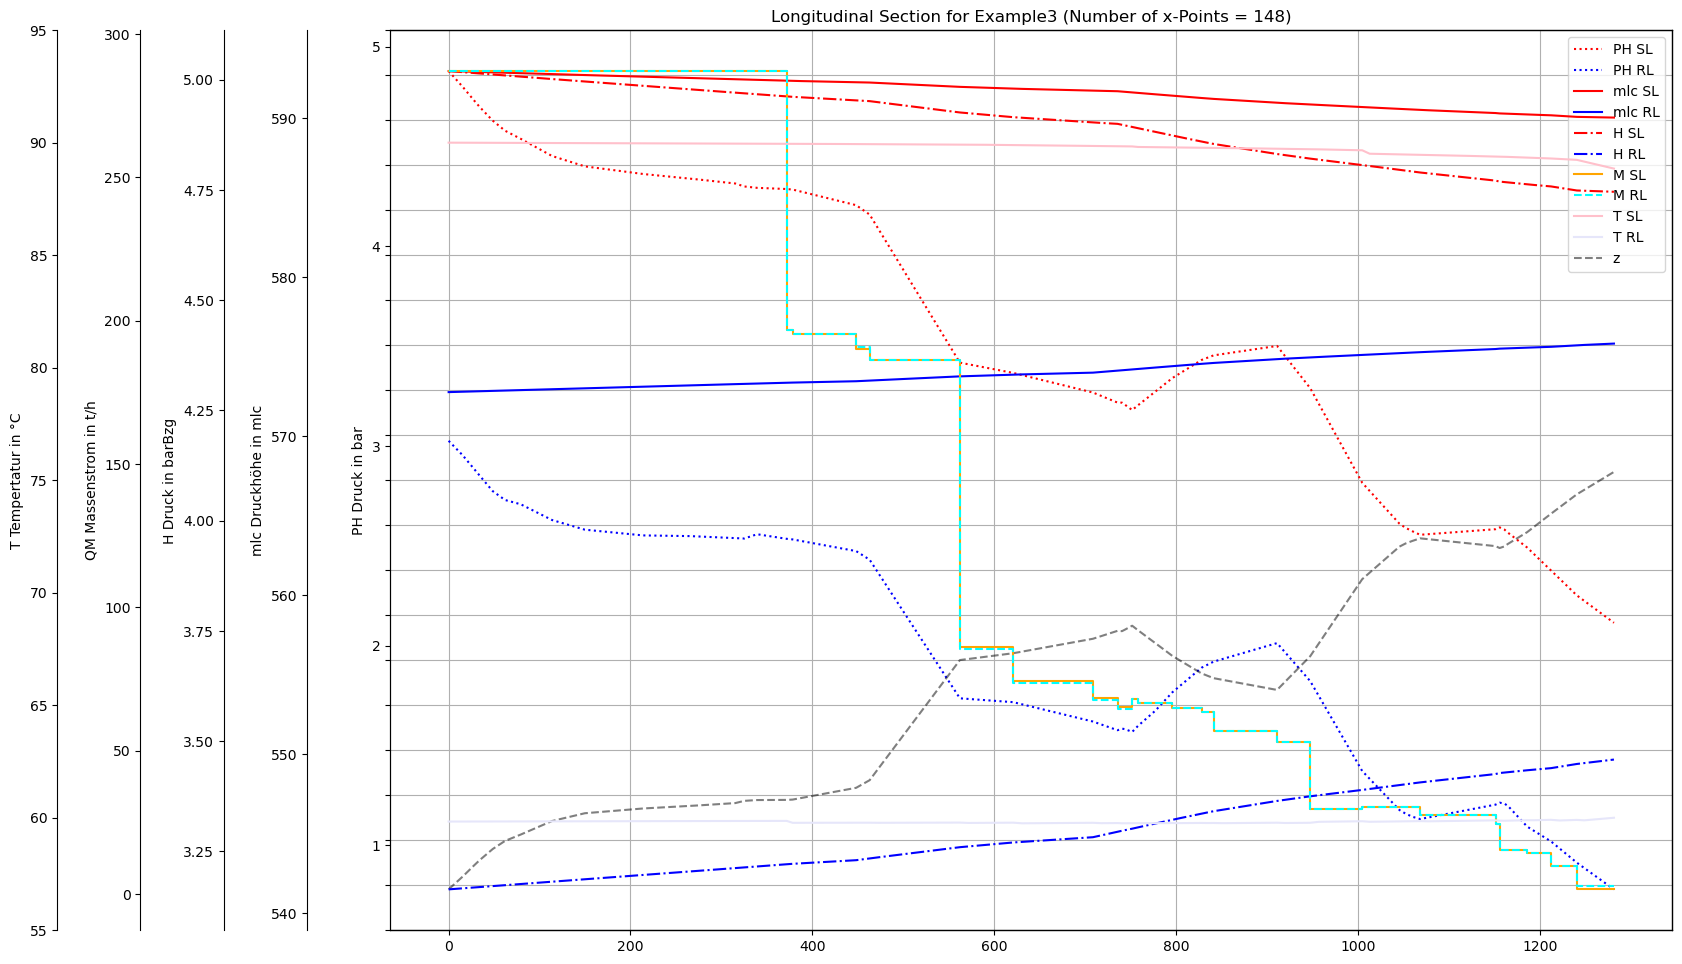

In [17]:
plot(dfAGSNVec,dfAGSNVecRL)

# Plot different timesteps with Bokeh

In [18]:
def bokeh_plot(df, x_col, y_cols, y2_cols):
    output_notebook()
    # Create a new plot with a title and axis labels
    p = figure(title=f"Plot of {x_col} vs. {', '.join(y_cols + y2_cols)}", x_axis_label=x_col, y_axis_label="PH Druck in bar", tools="pan,wheel_zoom,box_zoom,reset")
    
    # Define line styles and colors
    line_styles = ['solid', 'dashed', 'dotted']
    colors = ['blue', 'red']
    
    # Add a line renderer for each y column with different line styles and same color
    renderers = []
    for i, y_col in enumerate(y_cols):
        renderer = p.line(df[x_col], df[y_col], legend_label=f"06:00" if i == 0 else f"12:00" if i == 1 else f"18:00", line_width=2, line_dash=line_styles[i % len(line_styles)], color=colors[0])
        renderers.append(renderer)
    
    # Add a second y-axis with manual scaling
    p.extra_y_ranges = {"y2": Range1d(start=0, end=6)}
    p.add_layout(LinearAxis(y_range_name="y2", axis_label="QM Massenstrom in t/h"), 'right')
    
    # Add a line renderer for each y2 column with different line styles and same color
    for i, y2_col in enumerate(y2_cols):
        renderer = p.line(df[x_col], df[y2_col], legend_label=f"06:00" if i == 0 else f"12:00" if i == 1 else f"18:00", line_width=2, line_dash=line_styles[i % len(line_styles)], color=colors[1], y_range_name="y2")
        renderers.append(renderer)
    
    # Add hover tool
    hover = HoverTool()
    hover.tooltips = [("x", f"@{x_col}"), ("y", "$y")]
    p.add_tools(hover)
    
    # Show the results
    show(p)

In [19]:
bokeh_plot(dfAGSNVec, 'LSum', ['QM_1', 'QM_2', 'QM_3'],['PH_n_1', 'PH_n_2', 'PH_n_3'])

Loading BokehJS ...

In [20]:
#JAB 13.12 still TODO Add Toggeling + Fix issues